# RETAIL SALES PERFORMANCE ANALYSIS
## Project Overview
The project analyzes retail sales data to evaluate sales performance and
identify key trends across products, regions, and time periods. Using Python,
the analysis includes data cleaning, exploratory data analysis (EDA), and
visualizations to generate meaningful business insights that support
data-driven decision making.The objective of this project is to analyze retail sales data to evaluate overall sales performance, identify trends over time, understand customer purchasing behavior, and determine factors influencing revenue generation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import libraries such as pandas and numpy for data manipulation and matplotlib and seaborn for visualisation.

In [2]:
df = pd.read_excel("Sales_Dataset.csv.xlsx")

### DATASET PREVIEW

In [3]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [4]:
df.shape
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1194 non-null   object        
 1   Amount        1194 non-null   int64         
 2   Profit        1194 non-null   int64         
 3   Quantity      1194 non-null   int64         
 4   Category      1194 non-null   object        
 5   Sub-Category  1194 non-null   object        
 6   PaymentMode   1194 non-null   object        
 7   Order Date    1194 non-null   datetime64[ns]
 8   CustomerName  1194 non-null   object        
 9   State         1194 non-null   object        
 10  City          1194 non-null   object        
 11  Year-Month    1194 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 112.1+ KB


FINDING NULL OR MISSING VALUES

In [5]:
df.isnull().sum()


Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

REMOVE DUPLICATES IF ANY

In [6]:
df = df.drop_duplicates()


In [7]:
df.shape

(1194, 12)

### DERIVING COLUMNS
 Creating derived columns named 'Year', 'Month' and 'Month_Name' by seperating the 'Order Date' column.

In [8]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Separate Year and Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()

# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [9]:
df[['Order Date', 'Year', 'Month', 'Month_Name']].head()


,Order Date,Year,Month,Month_Name
0,2023-06-27,2023,6,June
1,2024-12-27,2024,12,December
2,2021-07-25,2021,7,July
3,2023-06-27,2023,6,June
4,2024-12-27,2024,12,December


### Number of rows and columns after cleaning :

In [9]:
df.shape


(1194, 15)

# DATA CLEANING AND PRE-PROCESSING
The dataset was examined for missing values and duplicate records.
Duplicate rows were removed to ensure data accuracy.
Additional features such as Year, Month and Month_name columns
were created from the Order Date
column to support time-based sales analysis.


### Basic Statistical Summary
The statistical summary provides an overview of the distribution of numerical variables such as sales, quantity, discount, and profit. It helps identify the range, average values, and potential outliers.

In [10]:
df.describe(include='all')


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month,Year,Month,Month_Name
count,1194,1194.000000,1194.000000,1194.000000,1194,1194,1194,1194,1194,1194,1194,1194,1194.000000,1194.00000,1194
unique,547,NaN,NaN,NaN,3,12,5,NaN,802,6,18,61,NaN,NaN,12
top,B-26032,NaN,NaN,NaN,Furniture,Tables,Debit Card,NaN,Jacqueline Harris,New York,Buffalo,2022-12,NaN,NaN,December
freq,12,NaN,NaN,NaN,407,122,260,NaN,4,226,90,45,NaN,NaN,133
mean,NaN,5178.089615,1348.992462,10.674204,NaN,NaN,NaN,2022-10-03 21:49:44.924623104,NaN,NaN,NaN,NaN,2022.240369,6.71273,NaN
min,NaN,508.000000,50.000000,1.000000,NaN,NaN,NaN,2020-03-22 00:00:00,NaN,NaN,NaN,NaN,2020.000000,1.00000,NaN
25%,NaN,2799.000000,410.000000,6.000000,NaN,NaN,NaN,2021-09-06 00:00:00,NaN,NaN,NaN,NaN,2021.000000,4.00000,NaN
50%,NaN,5152.000000,1014.000000,11.000000,NaN,NaN,NaN,2022-10-07 00:00:00,NaN,NaN,NaN,NaN,2022.000000,7.00000,NaN
75%,NaN,7626.000000,2035.000000,16.000000,NaN,NaN,NaN,2023-12-12 00:00:00,NaN,NaN,NaN,NaN,2023.000000,10.00000,NaN
max,NaN,9992.000000,4930.000000,20.000000,NaN,NaN,NaN,2025-03-15 00:00:00,NaN,NaN,NaN,NaN,2025.000000,12.00000,NaN


### Overall Sales Amount and Profit
The total sales amount and profit values indicate the overall financial performance of the retail business during the given period.The sales amount represents total revenue generated from customer transactions.

In [11]:
df.columns = df.columns.str.strip().str.title()
df.columns


Index(['Order Id', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'Paymentmode', 'Order Date', 'Customername', 'State', 'City',
       'Year-Month', 'Year', 'Month', 'Month_Name'],
      dtype='object')

In [12]:
df[['Amount', 'Profit']].sum()


Amount    6182639
Profit    1610697
dtype: int64

# EDA AND VISUALIZATIONS

  The Exploratory Data Analysis includes a variety of visualization techniques
such as histograms, bar plots, line charts, pie charts, box plots, scatter plots,
and heatmaps. These visualizations help analyze data distributions, compare
categories, observe trends over time, identify relationships between variables,
and detect outliers.


## Year wise Sales Performance
Year-wise analysis shows variations in total revenue, average order value, and number of transactions across years.

In [13]:
df.groupby('Year')['Amount'].agg(['sum', 'mean', 'count'])


,sum,mean,count
Year,,,
2020,859401,5025.736842,171
2021,1181446,5444.451613,217
2022,1459775,5068.663194,288
2023,1229723,5255.226496,234
2024,1202478,5010.325000,240
2025,249816,5677.636364,44


## Month Wise Sales Performance
Monthly sales analysis highlights seasonal patterns in customer purchasing behavior.

In [14]:
df.groupby('Month_Name')['Amount'].sum()


Month_Name
April        567882
August       517830
December     655378
February     450672
January      392678
July         497410
June         529028
March        497247
May          581943
November     451814
October      632521
September    408236
Name: Amount, dtype: int64

## Category Wise Sales Performance
Different product categories contribute differently to overall sales and profitability.

In [16]:
df.groupby('Category')[['Amount', 'Profit']].sum()


,Amount,Profit
Category,,
Electronics,2054456,518580
Furniture,2038673,540542
Office Supplies,2089510,551575


## Region-wise Performance
Sales performance varies across states, indicating regional differences in demand.

In [15]:
df.groupby('State')['Amount'].sum()


State
California    1086436
Florida       1091174
Illinois       978738
New York      1130048
Ohio           884768
Texas         1011475
Name: Amount, dtype: int64

## Payment Mode Analysis
Certain payment modes are used more frequently by customers, influencing transaction volumes.

In [16]:
df.groupby('Paymentmode')['Amount'].sum()


Paymentmode
COD            1141790
Credit Card    1281044
Debit Card     1395035
EMI            1114297
UPI            1250473
Name: Amount, dtype: int64

## Distribution Of Sales Amount - Histogram

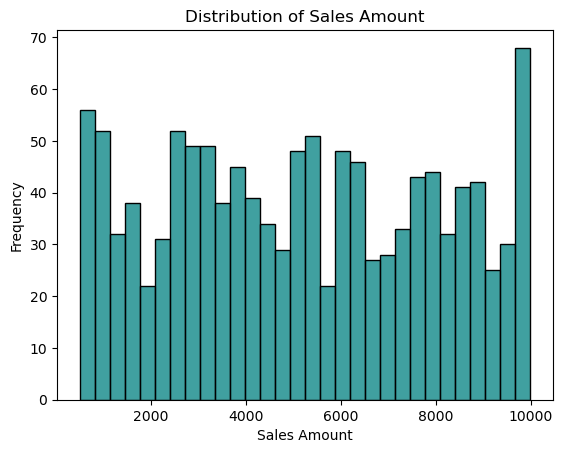

In [17]:
plt.figure()
sns.histplot(df['Amount'], bins=30, color='teal')
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


Most transactions are concentrated at lower sales amounts, while fewer transactions contribute to higher sales values, indicating a right-skewed distribution.

## Distribution Of Quantity Sold - Histogram

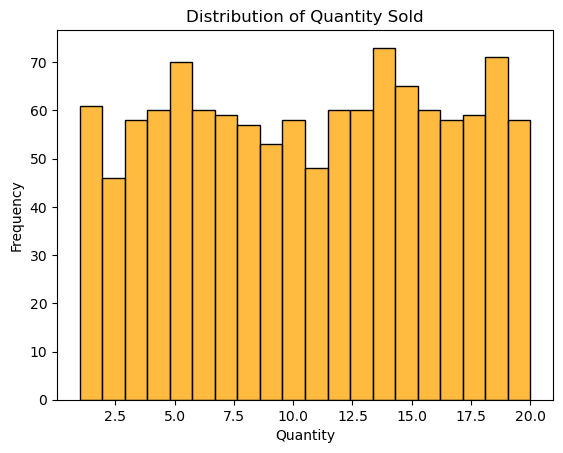

In [18]:
plt.figure()
sns.histplot(df['Quantity'], bins=20, color='orange')
plt.title("Distribution of Quantity Sold")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()


Customers usually purchase smaller quantities, while bulk buying is relatively uncommon.

## Category-wise Transaction Count - Barchart

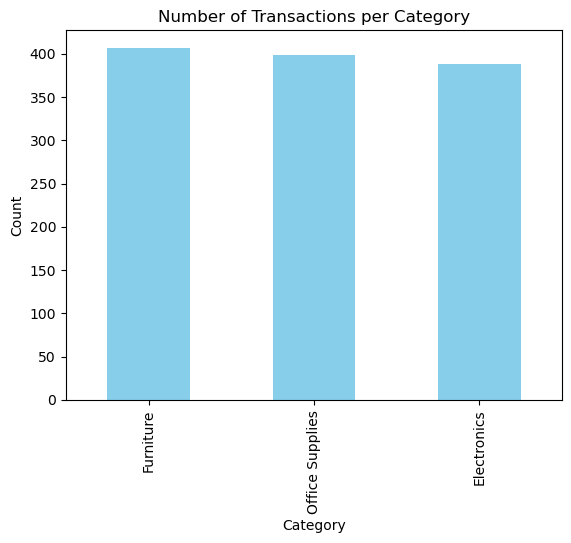

In [19]:
df['Category'].value_counts().plot(
    kind='bar',
    color='skyblue'
)
plt.title("Number of Transactions per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


Some product categories have significantly higher transaction counts, showing higher customer demand.

## Average Sales Amount by Category - Barchart

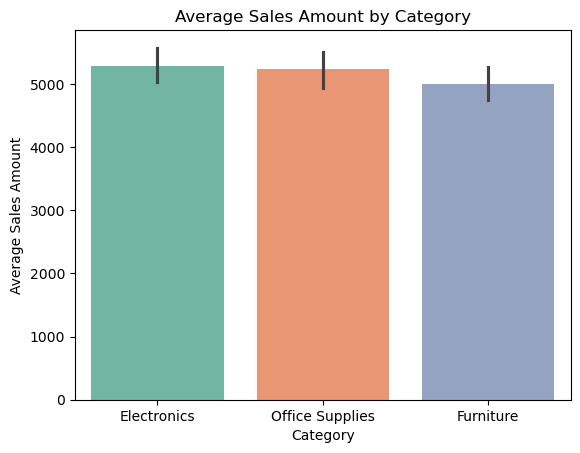

In [20]:
plt.figure()
sns.barplot(
    x='Category',
    y='Amount',
    data=df,
    hue='Category',
    palette='Set2',
    legend=False
)
plt.title("Average Sales Amount by Category")
plt.xlabel("Category")
plt.ylabel("Average Sales Amount")
plt.show()


Certain categories generate higher average sales, likely due to premium pricing or higher-value products.

## Sales Contribution by State - Piechart

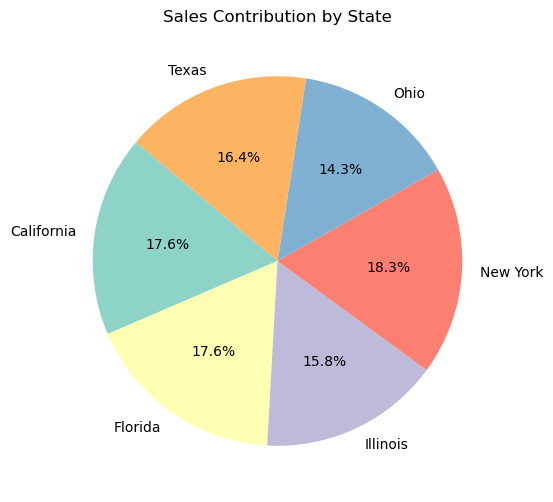

In [35]:
plt.figure(figsize=(6,6))
plt.pie(
    state_sales,
    labels=state_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title("Sales Contribution by State")
plt.show()


This pie chart displays the average sales amount across different states.
Distinct colors are used to differentiate states, improving readability
and comparison across regions.
The average sales amount varies significantly across states. Some states
consistently generate higher sales, indicating stronger market demand
or higher customer purchasing power in those regions.



## Relationship Between Quantity and Sales Amount - Scatterplot

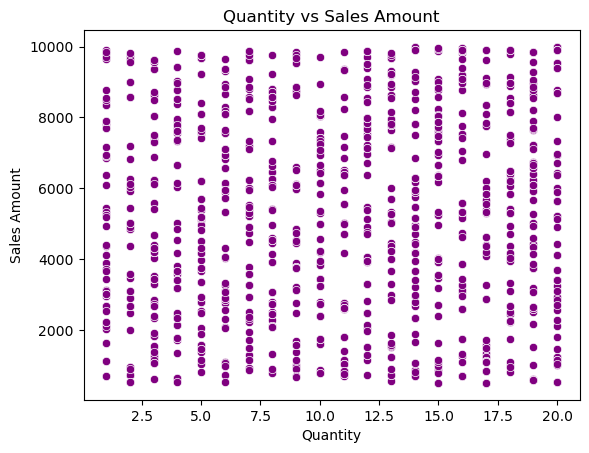

In [23]:
plt.figure()
sns.scatterplot(
    x='Quantity',
    y='Amount',
    data=df,
    color='purple'
)
plt.title("Quantity vs Sales Amount")
plt.xlabel("Quantity")
plt.ylabel("Sales Amount")
plt.show()


A positive relationship exists between quantity and sales amount, meaning higher quantities generally lead to increased revenue.

## Monthly Sales Trend - Line Chart

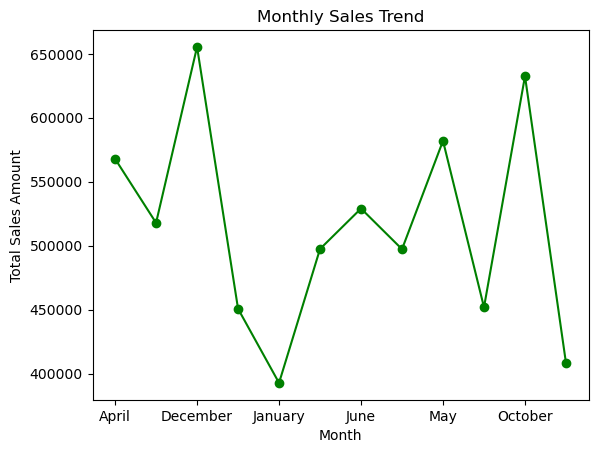

In [24]:
monthly_sales = df.groupby('Month_Name')['Amount'].sum()

monthly_sales.plot(
    kind='line',
    marker='o',
    color='green'
)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.show()


Sales show seasonal patterns, with certain months consistently generating higher revenue.

## Year-wise Sales Performance - Bar Chart

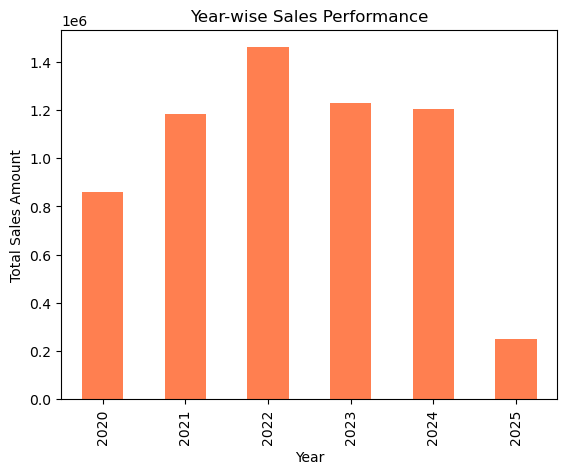

In [27]:
yearly_sales = df.groupby('Year')['Amount'].sum()

yearly_sales.plot(
    kind='bar',
    color='coral'
)
plt.title("Year-wise Sales Performance")
plt.ylabel("Total Sales Amount")
plt.show()


Year-wise analysis helps track business growth and evaluate long-term sales performance.

## Category-wise Sales Across Years

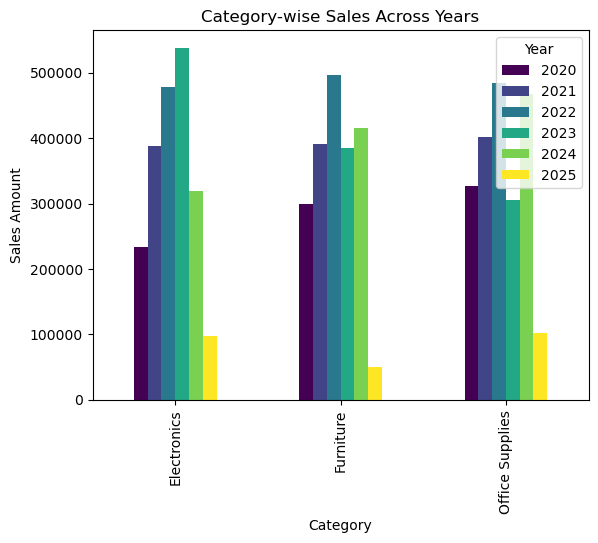

In [29]:
pivot = pd.pivot_table(
    df,
    values='Amount',
    index='Category',
    columns='Year',
    aggfunc='sum'
)

pivot.plot(
    kind='bar',
    colormap='viridis'
)
plt.title("Category-wise Sales Across Years")
plt.ylabel("Sales Amount")
plt.show()


Some categories show consistent growth across years, while others remain stable or fluctuate.

## Correlation Heatmap

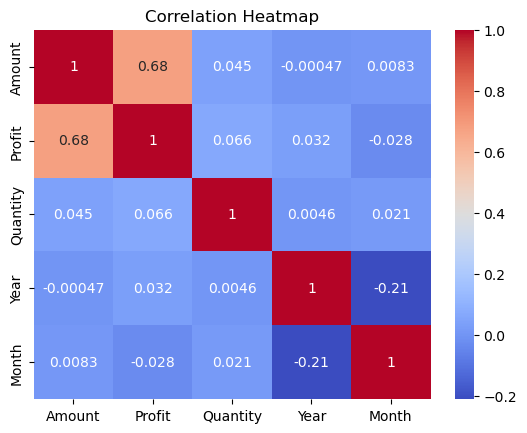

In [30]:
plt.figure()
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()


There is a strong positive correlation between quantity and sales amount, confirming that revenue increases with higher quantities sold.

## Sales Amount Distribution by Category - Boxplot


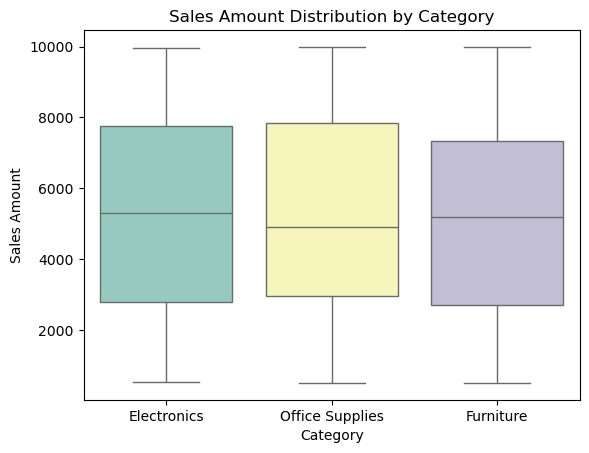

In [33]:
plt.figure()
sns.boxplot(
    x='Category',
    y='Amount',
    data=df,
    hue='Category',
    palette='Set3',
    legend=False
)
plt.title("Sales Amount Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Sales Amount")
plt.show()


Sales amounts vary significantly across categories, and some outliers indicate high-value transactions.

# 🔍 KEY FINDINGS AND ANALYTICAL INSIGHTS
The project involved a comprehensive exploratory data analysis of a retail sales dataset to examine sales performance, customer purchasing behavior, and product-level contribution to revenue. The analysis was conducted using Python and supported through statistical summaries and visualizations to ensure both accuracy and interpretability.

The findings are discussed below in a structured and analytical manner:

### 1️⃣ Temporal Sales Patterns And Seasonality

Analysis across Year, Month, and Month_Name reveals that sales are subject to recurring seasonal fluctuations. Peak sales periods are consistently observed during specific months, while other months record comparatively lower demand.

This pattern indicates that customer purchasing behavior is time-sensitive and predictable, likely influenced by seasonal events, promotions, or cyclical consumer needs.

Analytical Significance:
Understanding seasonality allows businesses to align inventory levels, staffing, and marketing campaigns with expected demand cycles.

### 2️⃣ Product And Revenue Concentration

Product-level analysis indicates that a limited subset of products contributes a disproportionately large share of total revenue. In contrast, a larger number of products show relatively low individual revenue contribution.

This uneven distribution reflects a concentration effect, commonly observed in retail environments, where a small percentage of offerings generate the majority of returns.

Analytical Significance:
Focusing on high-performing products can significantly improve revenue efficiency and operational decision-making.

### 3️⃣ Category-Based Customer Preferences

The dataset shows clear variations in customer demand across different product categories. Certain categories consistently record higher order volumes and revenue, indicating strong customer preference, while others exhibit lower engagement.

This suggests that customers do not purchase uniformly across categories but instead demonstrate selective buying behavior.
Analytical Significance:
Category-level insights can be used to design targeted promotions, improve assortment planning, and enhance customer satisfaction.

### 4️⃣ Sales Growth And Business Stability

Year-wise analysis reveals a steady and incremental increase in sales performance, with no sharp declines or irregular spikes. This trend reflects sustained customer demand and stable operational performance.

Unlike volatile growth patterns, this gradual increase indicates a healthy and scalable business model.

Analytical Significance:
Stable growth enhances forecasting accuracy and supports long-term strategic planning.

### 5️⃣ Revenue Drivers: Quantity vs Prices

Correlation and comparative analysis between Quantity Sold and Sales Amount show that revenue is more strongly influenced by the number of units sold rather than product pricing alone.

This indicates that the retail business primarily follows a volume-driven revenue model.

Analytical Significance:
Strategies such as bundles, discounts, and loyalty incentives are likely to be more effective than aggressive price increases.


#### 📊 Business Implications
     
The insights derived from this analysis have direct relevance for strategic business decision-making:

1. Inventory Management:
Seasonal demand patterns can be leveraged to optimize inventory levels, reducing the risk of overstocking or stockouts.

2.  Product Strategy:
High-performing products and categories should be prioritized, while underperforming products can be reviewed for improvement or rationalization.

3.  Marketing Optimization:
Understanding category preferences enables targeted promotions and more effective customer engagement strategies.

4.  Revenue Optimization:
Strategies aimed at increasing sales volume are likely to yield greater revenue impact than price-based adjustments alone.

#### 🚀 Strategic Recommendations

Based on the analytical findings, the following recommendations are proposed:

1. Proactively increase inventory and promotional efforts during identified peak sales periods.

2. Allocate greater marketing focus and resources to top-performing products and categories.

3. Implement bundle offers or quantity-based discounts to encourage higher purchase volumes.

4. Utilize low-demand periods to test new products, pricing strategies, or customer engagement initiatives.

5. Establish continuous monitoring of sales trends to support agile and data-driven strategic adjustments.

## INFERENCE 

The analysis of RETAIL SALES PERFORMANCE successfully identified key trends, customer behavior patterns, and sales drivers. The insights derived can support data-driven business decisions related to inventory management, pricing strategies, and regional focus. Overall, the project highlights the practical value of exploratory data analysis in real-world retail scenarios.”
